In [2]:
# pandasからSeries, DataFrameの読み込み
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [10]:
# seabornの読み込み
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# yahoo or Googleから株価をそのままダウンロード可能
from pandas_datareader import data as web

In [14]:
# 日付と時刻を扱えるようになる
from datetime import datetime

In [16]:
# Apple, Google, Microsoft, Amazonを表示する文字列
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [17]:
# いつからのデータを扱うか
# 去年の今から今日までの株価を取得できる
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [28]:
# DataFrame化している
for stock in tech_list:
    
    globals()[stock] = web.DataReader(stock, 'google', start, end)

/Users/Takanori/anaconda/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [29]:
# DataFrame化されていることが分かる
# Open : 初値, High : 一日の取引の中で一番高かった価格
# Low : １日の取引で一番低かった価格
# Close : その日の終値
# Volume : 出来高
AAPL.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,162.854440,164.159120,161.537320,162.852880,3.045133e+07
std,10.445396,10.578882,10.435133,10.461078,1.224138e+07
min,142.900000,143.500000,142.200000,142.270000,1.402667e+07
25%,154.200000,155.115000,153.360000,154.147500,2.187763e+07
50%,162.370000,163.890000,160.255000,162.515000,2.710292e+07
75%,172.537500,174.090000,171.512500,172.485000,3.542170e+07
max,182.590000,183.500000,180.210000,181.720000,8.659382e+07


In [33]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-05-04 to 2018-05-03
Data columns (total 5 columns):
Open      250 non-null float64
High      250 non-null float64
Low       250 non-null float64
Close     250 non-null float64
Volume    250 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


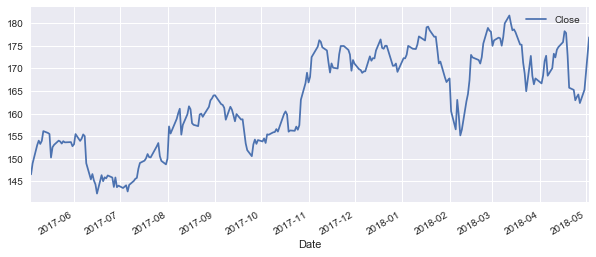

In [34]:
# 過去1年間のAppleの株価を可視化
AAPL['Close'].plot(legend=True, figsize=(10, 4))

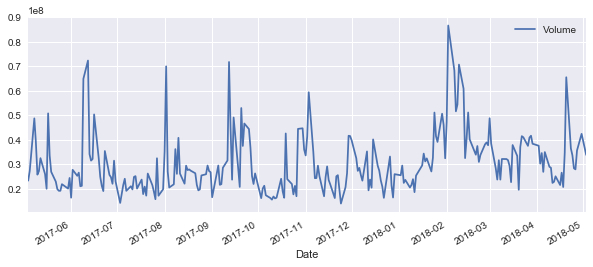

In [36]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

#### <font color='blue'>移動平均について計算をする</font>

移動平均線とはグラフから、10日・20日・50日間という決まった期間を平均してグラフ化する。<br>

In [37]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    # 終値に対して移動平均をとる
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'], ma)

/Users/Takanori/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/Users/Takanori/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/Users/Takanori/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


In [41]:
AAPL.tail()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50
Date,,,,,,,,
2018-04-25,162.62,165.42,162.41,163.65,28382084,171.112,170.449,172.8534
2018-04-26,164.12,165.73,163.37,164.22,27963014,170.120,170.336,172.8510
2018-04-27,164.00,164.33,160.63,162.32,35655839,168.879,170.063,172.7500
2018-04-30,162.13,167.26,161.84,165.26,42427424,167.823,169.992,172.5954
2018-05-03,175.88,177.50,174.44,176.89,33855789,167.688,170.417,172.6846


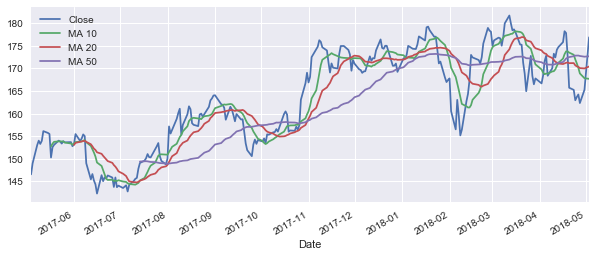

In [39]:
AAPL[['Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10, 4))

In [42]:
# 株価できになるのは終値を昨日の終値と比較したもの
# pct_changeでそれぞれを比較して、どれくらい変化したかを調べる
AAPL['Daily Return'] = AAPL['Close'].pct_change()

In [43]:
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,
2017-05-04,146.52,147.14,145.81,146.53,23371872,NaN,NaN,NaN,NaN
2017-05-05,146.76,148.98,146.76,148.96,27327725,NaN,NaN,NaN,0.016584
2017-05-08,149.03,153.70,149.03,153.01,48752413,NaN,NaN,NaN,0.027189
2017-05-09,153.87,154.88,153.45,153.99,39130363,NaN,NaN,NaN,0.006405
2017-05-10,153.63,153.94,152.11,153.26,25805692,NaN,NaN,NaN,-0.004741


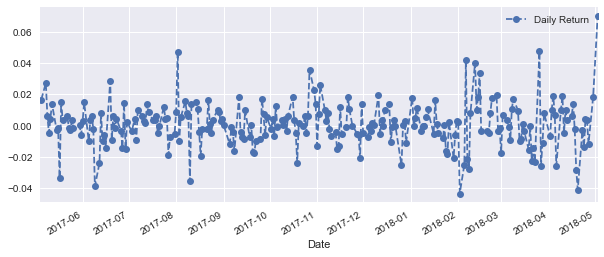

In [44]:
# 前日と比べてどれくらい変化したかが分かるグラフが可視化
AAPL['Daily Return'].plot(figsize=(10, 4), legend=True, linestyle='--', marker='o')

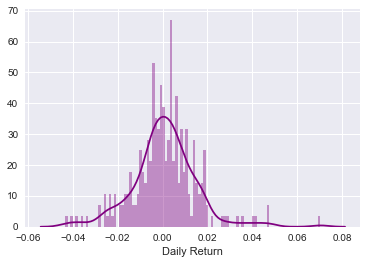

In [45]:
# ヒストグラムを作成する
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')

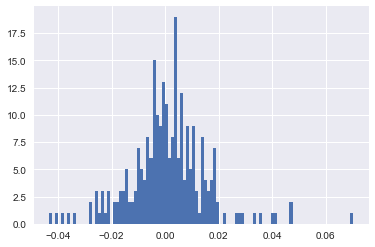

In [46]:
AAPL['Daily Return'].hist(bins=100)

In [48]:
# データをとってくる
closing_df = web.DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'google', start, end)['Close']

/Users/Takanori/anaconda/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [49]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-04,146.53,937.53,931.66,68.81
2017-05-05,148.96,934.15,927.13,69.00
2017-05-08,153.01,949.04,934.30,68.94
2017-05-09,153.99,952.82,932.17,69.04
2017-05-10,153.26,948.95,928.78,69.31


In [50]:
tech_rets = closing_df.pct_change()

In [51]:
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-04,NaN,NaN,NaN,NaN
2017-05-05,0.016584,-0.003605,-0.004862,0.002761
2017-05-08,0.027189,0.015940,0.007734,-0.000870
2017-05-09,0.006405,0.003983,-0.002280,0.001451
2017-05-10,-0.004741,-0.004062,-0.003637,0.003911
2017-05-11,0.004502,-0.001402,0.001960,-0.012264
2017-05-12,0.013966,0.014489,0.001741,-0.001169
2017-05-15,-0.002562,-0.003516,0.005213,0.000731
2017-05-16,-0.001477,0.008455,0.006317,0.014321


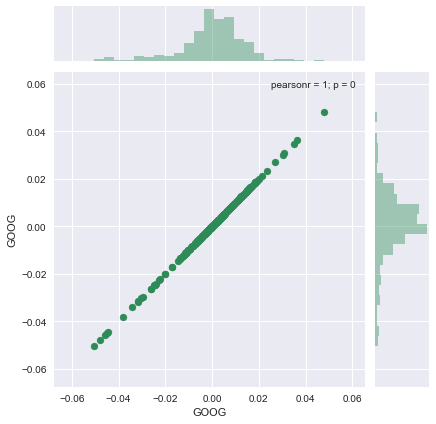

In [53]:
# 相関係数を算出している
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

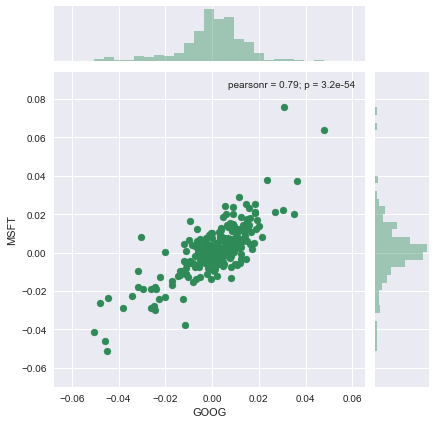

In [54]:
# microsoftとの相関係数を算出する
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter', color = 'seagreen')